In [31]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Prcp data between 1/1/17 and 1/1/18

In [3]:
# Create engine using the `demographics.sqlite` database file
engine = create_engine("sqlite:///hawaii.db")

# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [4]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [5]:
#Create a session
session = Session(engine)

In [8]:
# Query date and prcp from Measurement
prcp_query = pd.read_sql_query("SELECT date, prcp FROM measurement_sql WHERE date between '2017-01-01' AND '2018-01-01';", engine)

In [46]:
prcp_df = pd.DataFrame(prcp_query)
prcp_df = prcp_df.set_index('date')
prcp_df.head()

,prcp
date,
2017-01-01,0.0
2017-01-02,0.0
2017-01-03,0.0
2017-01-04,0.0
2017-01-05,0.0


Text(0,0.5,'Precipitation')

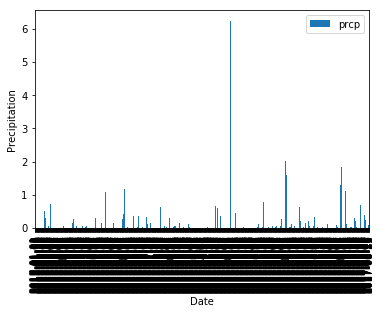

In [92]:
#Bar graph
prcp_df.plot.bar()
plt.xlabel("Date")
plt.ylabel("Precipitation")

In [65]:
# Query to find how many stations there are
count_query = pd.read_sql_query("SELECT COUNT(*) FROM station_sql;", engine)
count_query

,COUNT(*)
0,9


In [78]:
#Query to find which station has the highest number of observations
active_query = pd.read_sql_query("SELECT station,SUM(tobs) FROM measurement_sql GROUP BY station ORDER BY tobs DESC", engine)
active_query

#Station USC00519397 is the most active

,station,SUM(tobs)
0,USC00514830,144913
1,USC00519523,191698
2,USC00519397,200205
3,USC00517948,50943
4,USC00519281,198652
5,USC00513117,195940
6,USC00516128,176029
7,USC00518838,24855
8,USC00511918,138191


In [88]:
#Query for data for most active station for past 12 months
USC00519397_query = pd.read_sql_query("SELECT date,tobs FROM measurement_sql WHERE station = 'USC00519397' AND date between '2017-01-01' AND '2018-01-01' ", engine)
active_df = pd.DataFrame(USC00519397_query)
active_df = active_df.set_index('date')
active_df.head()

,tobs
date,
2017-01-01,62
2017-01-02,66
2017-01-03,63
2017-01-04,62
2017-01-05,63


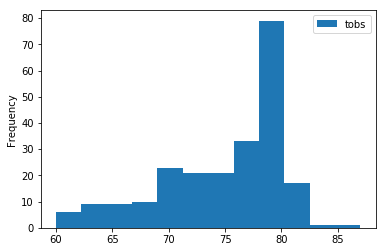

In [94]:
#Plot histogram
active_df.plot.hist(bins=12)

In [101]:
#Define a function
def calc_temps(begin_date, end_date):
    engine = create_engine("sqlite:///hawaii.db")
    temp_query = pd.read_sql_query("SELECT min(tobs),max(tobs),avg(tobs) FROM measurement_sql WHERE date between '" + begin_date + "' AND '" + end_date + "'", engine)
    return pd.DataFrame(temp_query)

In [104]:
#Run function for2017-2018
temp_df = calc_temps('2017-01-01', '2018-01-01')
temp_df

,min(tobs),max(tobs),avg(tobs)
0,58,87,74.020521


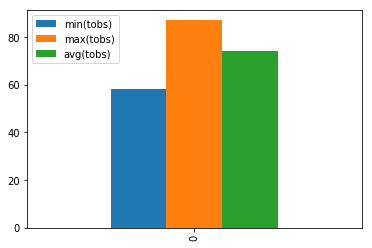

In [105]:
#Bar graph
temp_df.plot.bar()

 * Restarting with stat


SystemExit: 1

C:\Users\Linda\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:2870: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
